# Interpretation of Evaluation Metrics for a Credit Default Prediction Model

## 1. Accuracy
- **Formula**: 
  $$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$
- **Interpretation**: A high accuracy indicates that the model correctly predicts whether a person will default or not for a large proportion of the cases. However, in credit scoring, high accuracy alone can be misleading, especially if the dataset is imbalanced (e.g., many non-defaulters and few defaulters).

---

## 2. Precision
- **Formula**: 
  $$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$
- **Interpretation**: A high precision value signifies that when the model predicts a person will default, it is likely correct. This is crucial for lenders because a high false positive rate (incorrectly predicting default) can lead to denying credit to low-risk customers.

---

## 3. Recall (Sensitivity)
- **Formula**: 
  $$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$
- **Interpretation**: A high recall indicates that the model successfully identifies a large portion of actual defaulters. This is important for minimizing potential losses for the lender, as missing defaulters could result in significant financial risks.

---

## 4. F1 Score
- **Formula**: 
  $$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
- **Interpretation**: A high F1 score reflects a good balance between precision and recall, meaning the model is effective in both identifying defaulters and not incorrectly labeling non-defaulters as defaulters. This balance is critical in credit models, where both false negatives (missed defaulters) and false positives (unjustly denied loans) can have serious repercussions.

---

## 5. ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
- **Interpretation**: A high ROC-AUC value indicates that the model effectively distinguishes between defaulters and non-defaulters. In a credit context, this means the model can accurately rank customers based on their likelihood of defaulting, aiding in risk assessment.

---

## 6. Confusion Matrix
- **Interpretation**: The confusion matrix provides a detailed breakdown of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). In credit modeling, minimizing false positives is crucial to avoid denying credit to worthy applicants, while minimizing false negatives helps in reducing financial losses from defaults.

---

## 7. Kappa Score (Cohen's Kappa)
- **Formula**: 
  $$\text{Kappa} = \frac{P_o - P_e}{1 - P_e}$$
- **Interpretation**: A high Kappa score indicates a strong agreement between the model's predictions and the actual outcomes, beyond what would be expected by chance. In credit scoring, this reflects the model’s reliability in predicting defaults accurately, ensuring that the bank or lender can trust the model's assessments.

---

## 8. Kolmogorov-Smirnov (KS) Test
- **Formula**: 
  $$D = \max |F_1(x) - F_0(x)|$$
- **Interpretation**: A high KS statistic indicates a significant separation between the predicted probabilities of defaulters and non-defaulters. This is valuable for credit risk assessment as it shows that the model can effectively differentiate between high-risk and low-risk applicants, allowing lenders to make informed lending decisions.

---

## Conclusion
In the context of a credit model predicting defaults, the evaluation metrics collectively provide insights into the model's performance. While aiming for high precision and recall is essential, the interplay between these metrics is crucial for developing a reliable model that can accurately assess credit risk, minimize losses, and make sound lending decisions.


Accuracy: 0.85
Precision: 0.88
Recall: 0.83
F1 Score: 0.85
ROC-AUC: 0.91


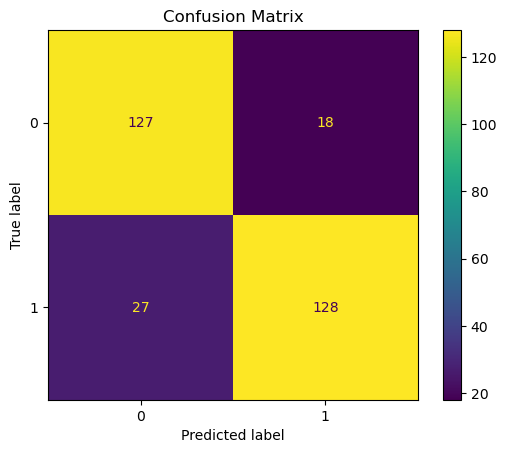

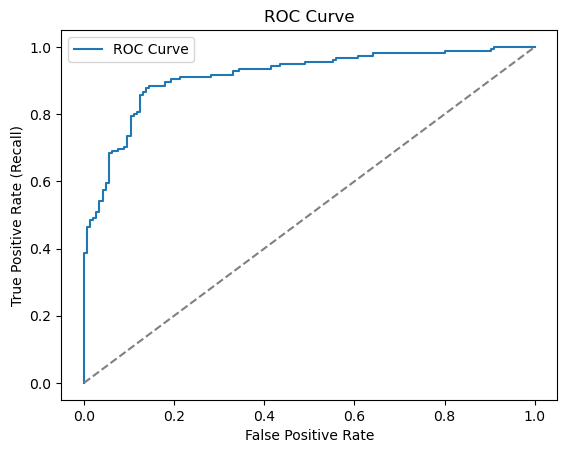

In [6]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve
)

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()
